In [35]:
from matplotlib import pyplot as plt
import re
import numpy as np
import torch
from deepsudoku import network as dsnet
from deepsudoku.utils import data_utils

# Testing network

In [9]:
def get_epoch_and_loss(file_line):
    m = re.match('ResBlocks (\d+).+validation loss = ([\d|.]+)', file_line)
    return int(m.group(1)), float(m.group(2))

In [12]:
loss_dict = {}

with open("documentation/Loss.txt", 'r') as f:
    for line in f:
        if r'#' in line:
            continue
        epoch, loss = get_epoch_and_loss(line)
        if epoch not in loss_dict.keys():
            loss_dict[epoch] = []
        loss_dict[epoch].append(loss)

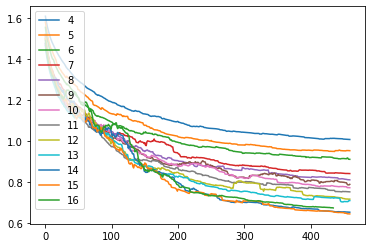

In [29]:
w = 40
for epoch, loss_array in loss_dict.items():
    moving_average = np.convolve(loss_array, np.ones(w))/w
    plt.plot(moving_average[w:-w+1])
plt.legend(loss_dict.keys(), loc = 'upper left')
plt.show()

In [34]:
j = 4
network = dsnet.Network(n_res_blocks = j)
network.load_state_dict(torch.load(f"documentation/models/06-16-2022/{j}_best.pth", map_location=torch.device('cpu'))["model_state_dict"])

<All keys matched successfully>

In [36]:
train_sudokus, val_sudokus, test_sudokus = data_utils.load_data()

test_sudokus = data_utils.make_moves(test_sudokus, data_utils.zero_moves_distribution)

In [47]:
x_train, y_train = data_utils.fast_generate_batch(test_sudokus)
x_train = torch.tensor(x_train.reshape(-1,1,9,9).astype('float32'))
y_train = (torch.tensor(y_train[0] - 1).type(torch.LongTensor), torch.tensor(y_train[1].astype('float32')))